# K Nearest Neighbours

In [45]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV

from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
from feature_selection import rf_select

### Splitting data

In [46]:
df, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 56) (12335,)
Validation set shape: (1542, 56) (1542,)
Test set shape: (1542, 56) (1542,)


## Without Sampling 

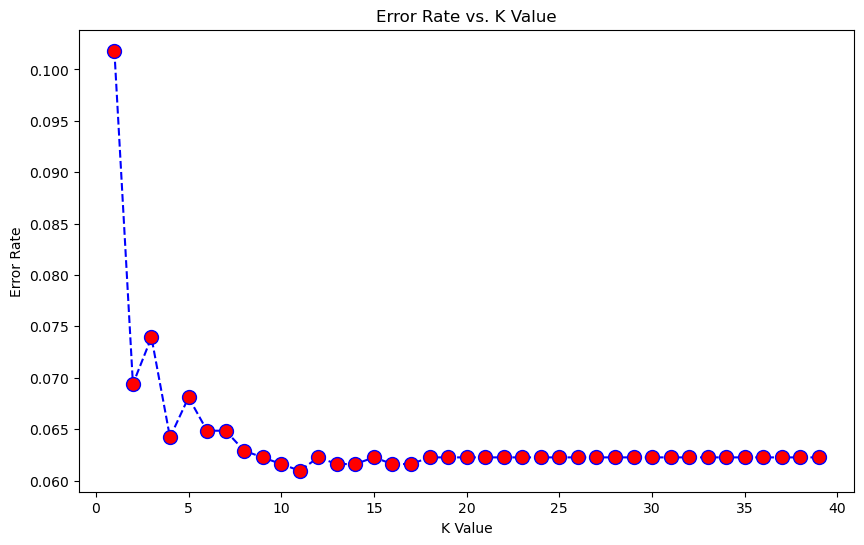

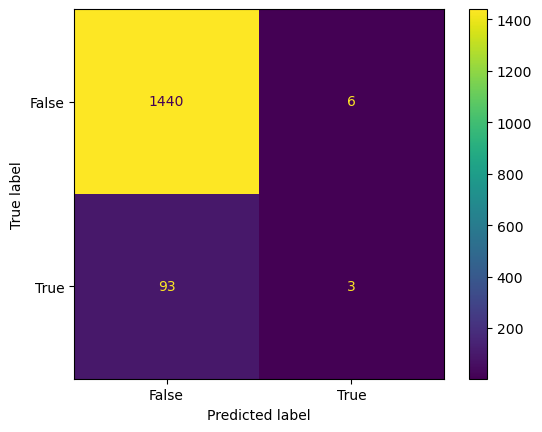

Accuracy: 0.9357976653696498
Precision: 0.3333333333333333
Recall: 0.03125
Specificity: 0.995850622406639
F1_score: 0.05714285714285714


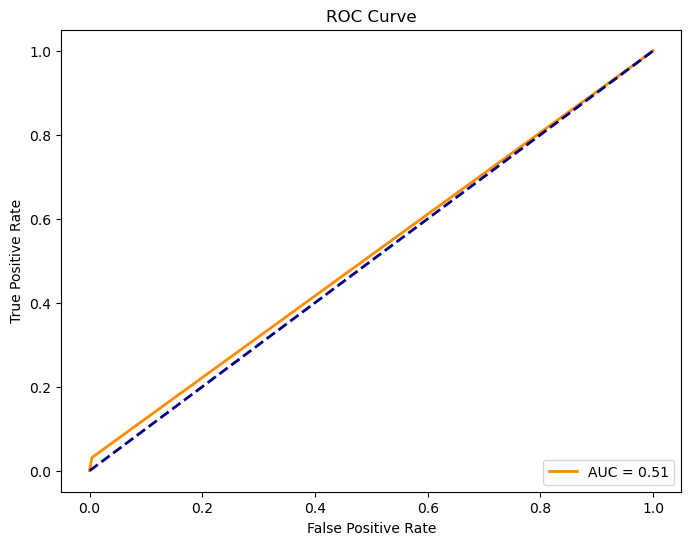

In [47]:
error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## Undersample

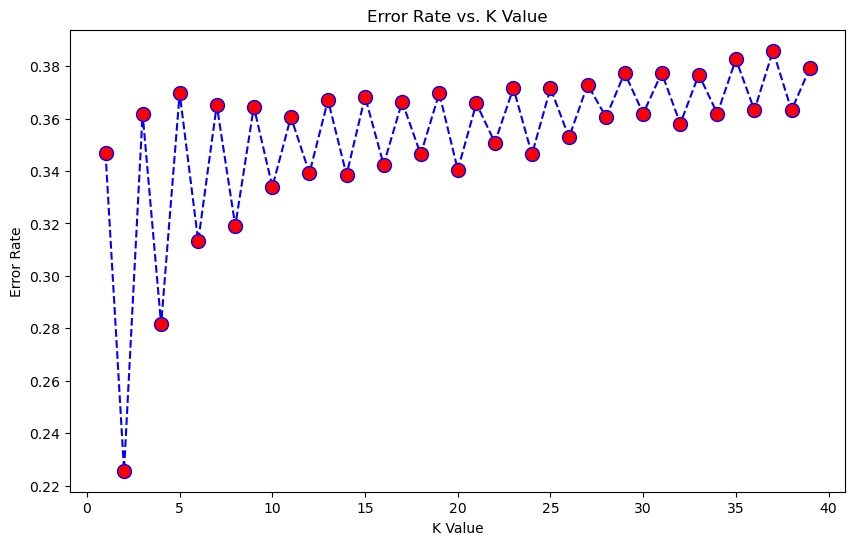

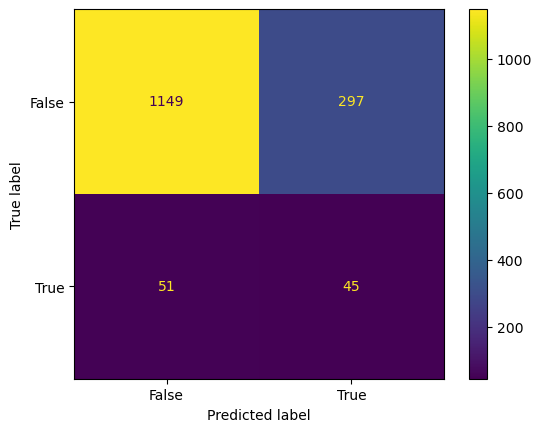

Accuracy: 0.77431906614786
Precision: 0.13157894736842105
Recall: 0.46875
Specificity: 0.7946058091286307
F1_score: 0.20547945205479454


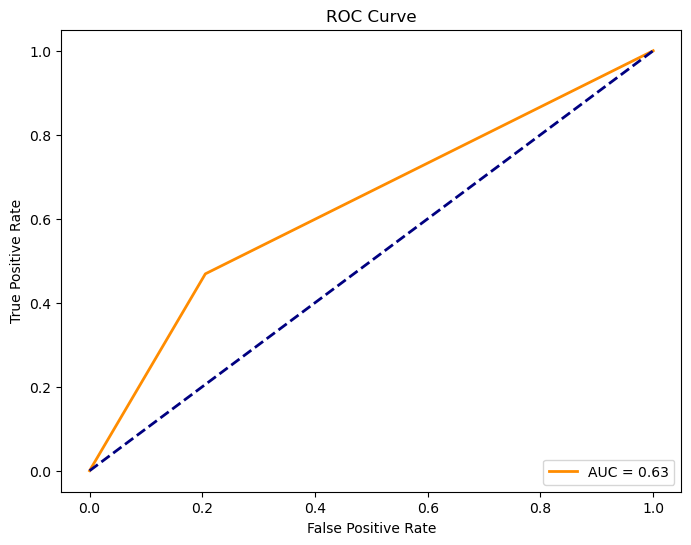

In [48]:
X_under, y_under = undersample(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_under,y_under)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_under,y_under)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## Oversample 

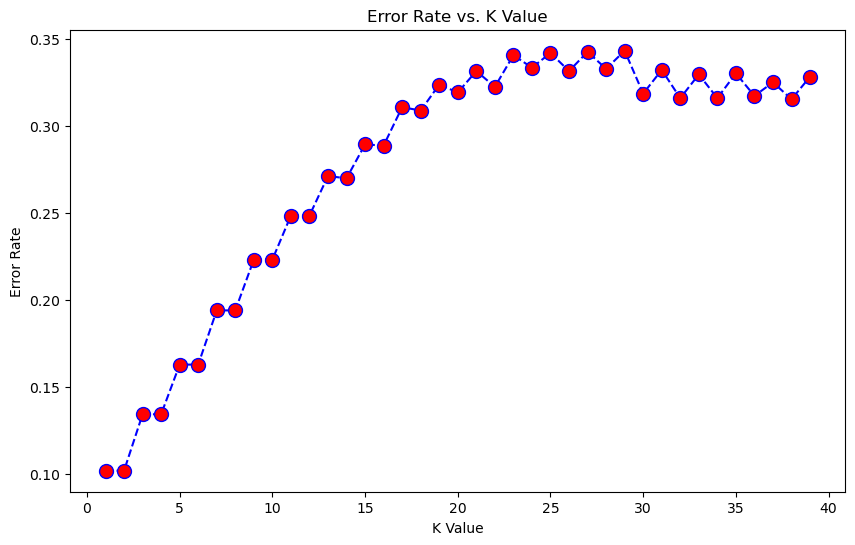

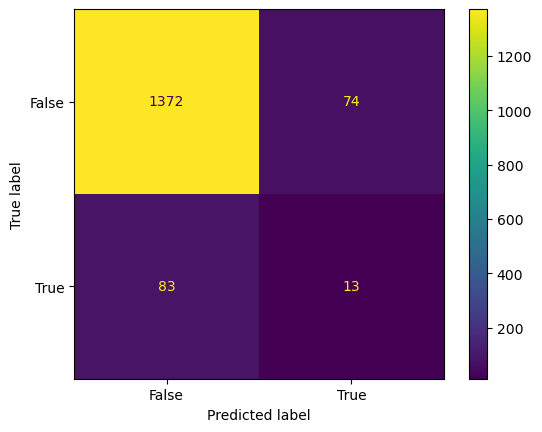

Accuracy: 0.8981841763942932
Precision: 0.14942528735632185
Recall: 0.13541666666666666
Specificity: 0.9488243430152143
F1_score: 0.14207650273224043


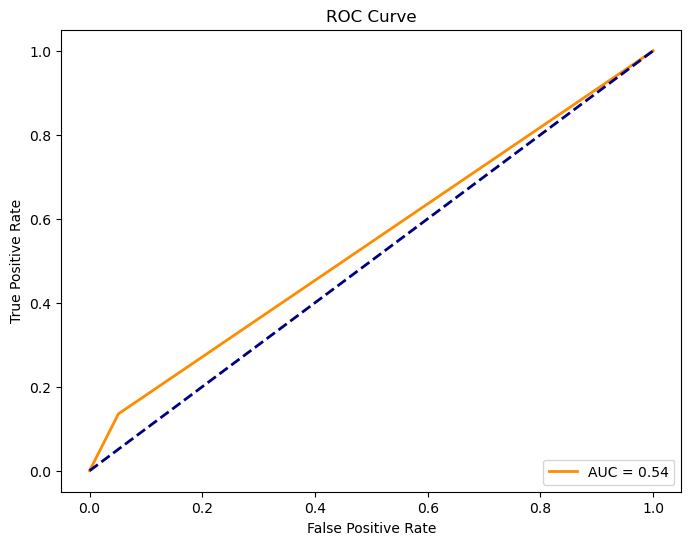

In [49]:
X_over, y_over = oversample(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_over,y_over)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over,y_over)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## SMOTE 

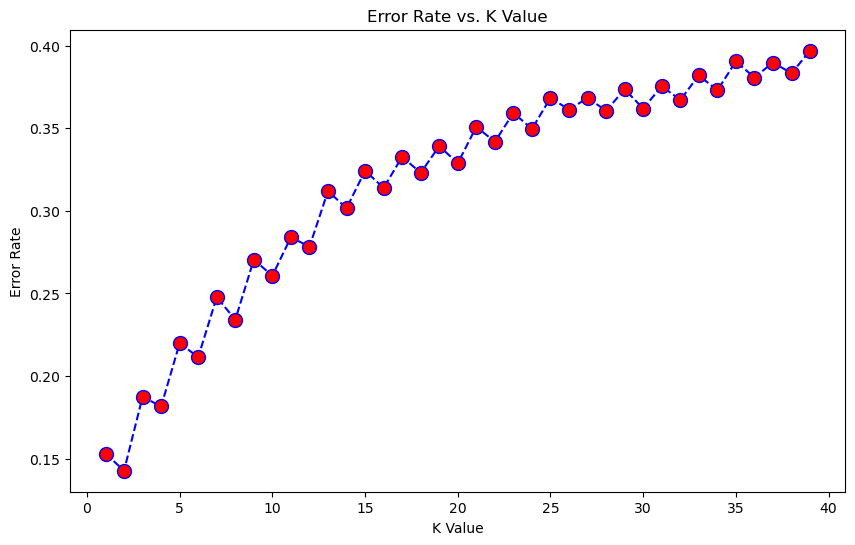

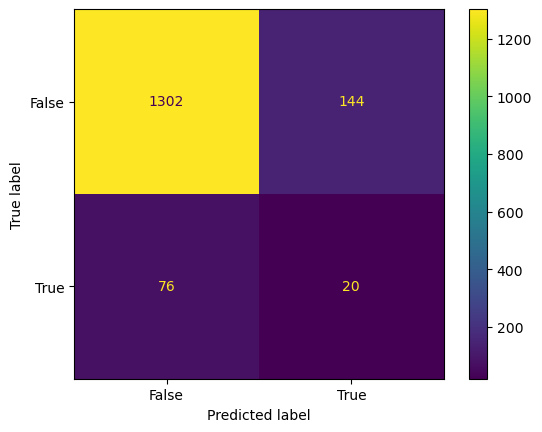

Accuracy: 0.8573281452658884
Precision: 0.12195121951219512
Recall: 0.20833333333333334
Specificity: 0.9004149377593361
F1_score: 0.15384615384615383


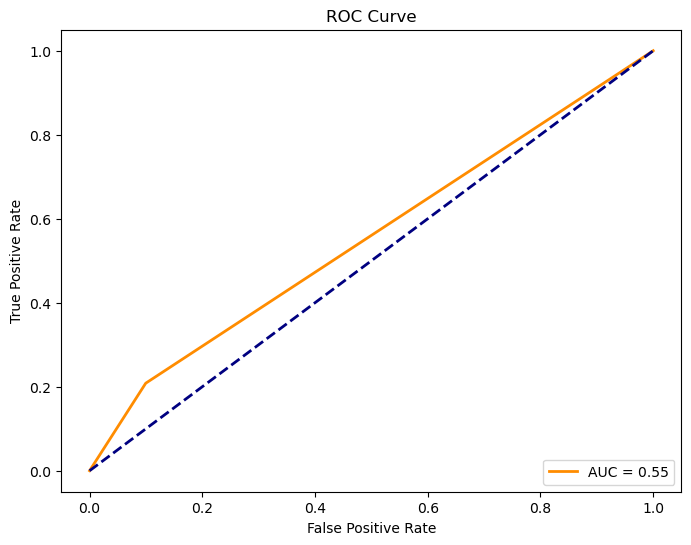

In [50]:
X_smote, y_smote = smote(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_smote,y_smote)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_smote,y_smote)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## NCR 

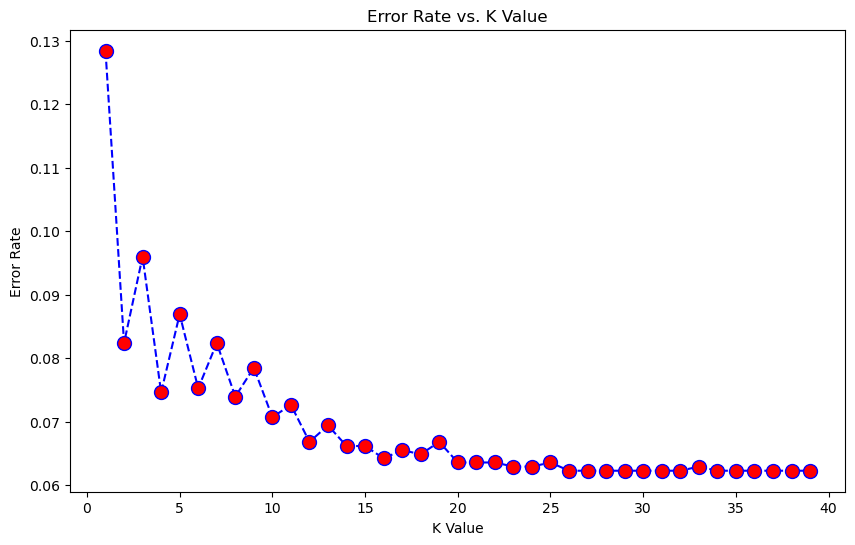

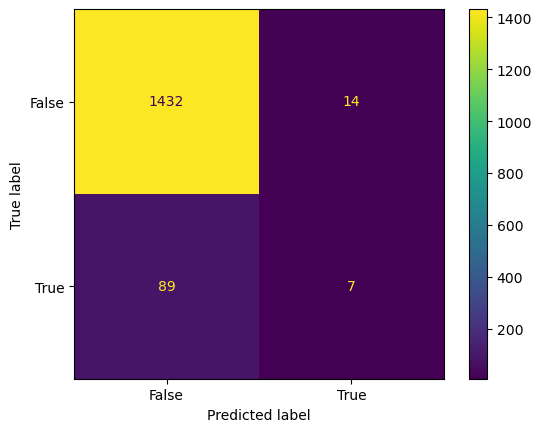

Accuracy: 0.9332036316472114
Precision: 0.3333333333333333
Recall: 0.07291666666666667
Specificity: 0.9903181189488244
F1_score: 0.11965811965811966


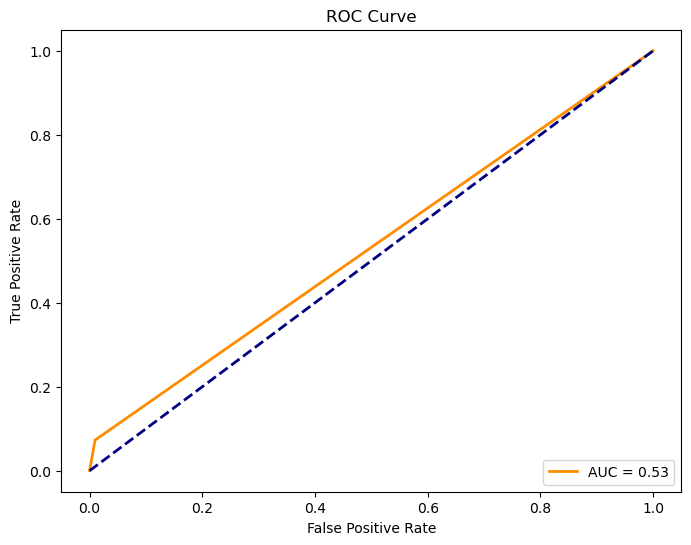

In [51]:
X_ncr, y_ncr = ncr(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_ncr,y_ncr)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_ncr,y_ncr)
y_pred = knn.predict(X_val)

show_metrics(y_val,y_pred, 1, 0)

## Undersample + Hyperparameter Tuning

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


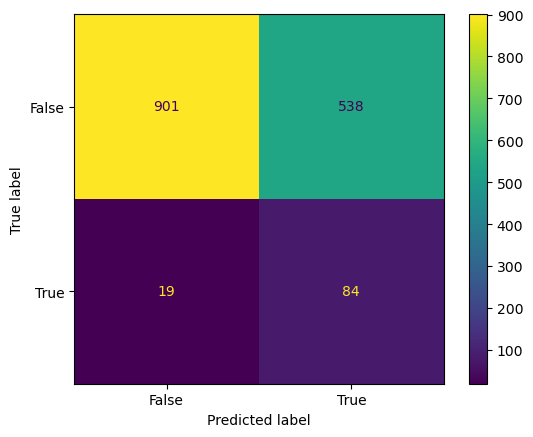

Accuracy: 0.6387808041504539
Precision: 0.13504823151125403
Recall: 0.8155339805825242
Specificity: 0.626129256428075
F1_score: 0.2317241379310345


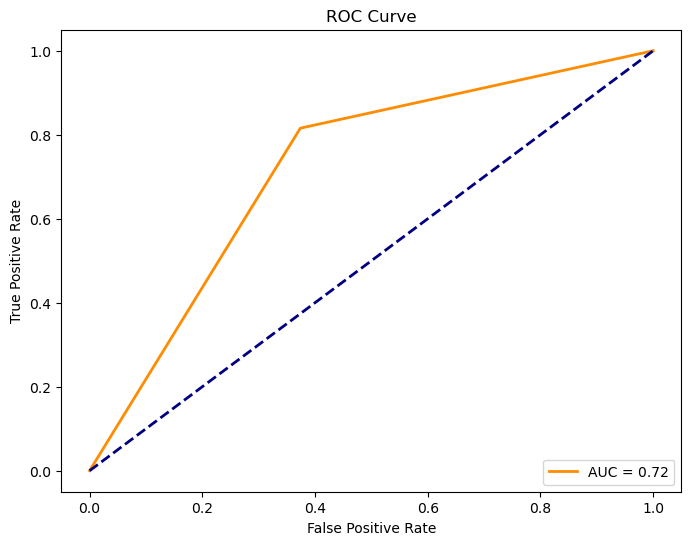

In [52]:
X_under, y_under = undersample(X_train, y_train)

param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall')

grid.fit(X_under, y_under)

print("Best Hyperparameters:", grid.best_params_)

best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],
                                 weights=grid.best_params_['weights'],
                                 algorithm=grid.best_params_['algorithm'],
                                 p=grid.best_params_['p'])
best_knn.fit(X_under, y_under)
y_pred = best_knn.predict(X_test)

show_metrics(y_test,y_pred, 1, 0)